In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.tree import plot_tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('LayOffDataset.csv')
dataset.shape

(3000, 26)

In [3]:
# exploring the dataset
dataset.head(10)

,EmpID,FirstName,LastName,StartDate,ExitDate,Title,Supervisor,ADEmail,BusinessUnit,EmployeeStatus,...,Division,DOB,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,3427,Uriah,Bridges,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,uriah.bridges@bilearner.com,CCDR,Active,...,Finance & Accounting,07-10-1969,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,3428,Paula,Small,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,paula.small@bilearner.com,EW,Active,...,Aerial,30-08-1965,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,3429,Edward,Buck,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,edward.buck@bilearner.com,PL,Active,...,General - Sga,06-10-1991,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,3430,Michael,Riordan,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,michael.riordan@bilearner.com,CCDR,Active,...,Finance & Accounting,04-04-1998,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,3431,Jasmine,Onque,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,jasmine.onque@bilearner.com,TNS,Active,...,General - Con,29-08-1969,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,3432,Maruk,Fraval,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,maruk.fraval@bilearner.com,BPC,Active,...,Field Operations,03-04-1949,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,3433,Latia,Costa,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,latia.costa@bilearner.com,WBL,Active,...,General - Eng,01-07-1942,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,3434,Sharlene,Terry,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,sharlene.terry@bilearner.com,CCDR,Active,...,Engineers,07-03-1957,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,3435,Jac,McKinzie,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,jac.mckinzie@bilearner.com,NEL,Active,...,Executive,15-05-1974,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,3436,Joseph,Martins,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,joseph.martins@bilearner.com,BPC,Active,...,Engineers,11-11-1949,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [4]:
# Removing unnecessary columns
dataset.drop(columns=['EmpID','ADEmail','FirstName','LastName','DOB'],inplace=True)
dataset.head(10)

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
0,2019-09-20 00:00:00.000,NaN,Production Technician I,Peter Oneill,CCDR,Active,Contract,Zone C,Temporary,Unk,...,Production,Finance & Accounting,MA,Accounting,Female,34904,White,Widowed,Fully Meets,4
1,2023-02-11 00:00:00.000,NaN,Production Technician I,Renee Mccormick,EW,Active,Contract,Zone A,Part-Time,Unk,...,Production,Aerial,MA,Labor,Male,6593,Hispanic,Widowed,Fully Meets,3
2,2018-12-10 00:00:00.000,NaN,Area Sales Manager,Crystal Walker,PL,Active,Full-Time,Zone B,Part-Time,Unk,...,Sales,General - Sga,MA,Assistant,Male,2330,Hispanic,Widowed,Fully Meets,4
3,2021-06-21 00:00:00.000,NaN,Area Sales Manager,Rebekah Wright,CCDR,Active,Contract,Zone A,Full-Time,Unk,...,Sales,Finance & Accounting,ND,Clerk,Male,58782,Other,Single,Fully Meets,2
4,2019-06-29 00:00:00.000,NaN,Area Sales Manager,Jason Kim,TNS,Active,Contract,Zone A,Temporary,Unk,...,Sales,General - Con,FL,Laborer,Female,33174,Other,Married,Fully Meets,3
5,2020-01-17 00:00:00.000,NaN,Area Sales Manager,Sheri Campos,BPC,Active,Contract,Zone B,Full-Time,Unk,...,Sales,Field Operations,CT,Driver,Male,6050,Black,Married,Fully Meets,3
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
8,2018-08-18 00:00:00.000,NaN,Area Sales Manager,Sharon Becker,NEL,Active,Contract,Zone B,Part-Time,Unk,...,Sales,Executive,TX,Executive Assistant,Male,78789,Black,Widowed,Exceeds,3
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   StartDate                   3000 non-null   object
 1   ExitDate                    1533 non-null   object
 2   Title                       3000 non-null   object
 3   Supervisor                  3000 non-null   object
 4   BusinessUnit                3000 non-null   object
 5   EmployeeStatus              3000 non-null   object
 6   EmployeeType                3000 non-null   object
 7   PayZone                     3000 non-null   object
 8   EmployeeClassificationType  3000 non-null   object
 9   TerminationType             3000 non-null   object
 10  TerminationDescription      1533 non-null   object
 11  DepartmentType              3000 non-null   object
 12  Division                    3000 non-null   object
 13  State                       3000 non-null   obje

In [6]:
# Filter the DataFrame to include only records with non-null ExitDate and involuntary and voluntary terminationType
filtered_dataset = dataset[
    (dataset['ExitDate'].notnull())   # Filter for non-null ExitDate
    # & (~dataset['TerminationType'].str.lower().isin(['resignation', 'retirement']))  # Exclude resignations and retirements (using ~ for negation and isin for multiple values)
]

filtered_dataset

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
6,2022-04-06 00:00:00.000,2023-07-03 00:00:00.000,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00.000,2023-01-29 00:00:00.000,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
9,2022-01-21 00:00:00.000,2023-06-29 00:00:00.000,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5
11,2018-08-10 00:00:00.000,2019-11-04 00:00:00.000,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,...,Sales,General - Con,GA,Technician,Female,30428,Asian,Married,Fully Meets,3
12,2022-05-25 00:00:00.000,2022-11-27 00:00:00.000,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,...,Sales,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2993,2020-10-10 00:00:00.000,2022-08-05 00:00:00.000,Production Technician I,Lynn Smith,NEL,Active,Contract,Zone A,Full-Time,Voluntary,...,Production,Field Operations,MA,Laborer,Female,18079,Other,Married,Fully Meets,2
2994,2022-05-09 00:00:00.000,2022-09-08 00:00:00.000,Production Technician I,Donna Lawson,PL,Active,Part-Time,Zone A,Part-Time,Retirement,...,Production,Wireless,MA,Foreman,Female,57340,Other,Divorced,Fully Meets,1
2995,2022-06-22 00:00:00.000,2022-08-07 00:00:00.000,Production Technician I,Bethany Carter,PYZ,Leave of Absence,Part-Time,Zone C,Part-Time,Retirement,...,Production,Engineers,MA,Model Assistant,Female,44500,Other,Widowed,Fully Meets,3
2997,2020-12-09 00:00:00.000,2022-08-04 00:00:00.000,Production Technician I,Mr. James Castillo,TNS,Voluntarily Terminated,Contract,Zone B,Temporary,Involuntary,...,Production,Wireline Construction,MA,Laborer,Male,6608,White,Single,Fully Meets,2


In [7]:
# Define a function to convert datetime column to seconds
def convert_datetime_to_seconds(df, column_name):
    df.loc[:, column_name] = pd.to_datetime(df[column_name], format = '%Y-%m-%d %H:%M:%S.%f')
# Convert 'StartDate' and 'ExitDate' columns to seconds
convert_datetime_to_seconds(filtered_dataset, 'StartDate')
convert_datetime_to_seconds(filtered_dataset, 'ExitDate')

filtered_dataset.head()

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,DepartmentType,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating
6,2022-04-06 00:00:00,2023-07-03 00:00:00,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,Sales,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4
7,2020-11-06 00:00:00,2023-01-29 00:00:00,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,Sales,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2
9,2022-01-21 00:00:00,2023-06-29 00:00:00,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,Sales,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5
11,2018-08-10 00:00:00,2019-11-04 00:00:00,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,...,Sales,General - Con,GA,Technician,Female,30428,Asian,Married,Fully Meets,3
12,2022-05-25 00:00:00,2022-11-27 00:00:00,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,...,Sales,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3


In [8]:
# Feature engineering
filtered_dataset['Tenure'] = (filtered_dataset['ExitDate'] - filtered_dataset['StartDate']) / pd.Timedelta('1D') / 365.25
# The above line calculates the tenure in years by:
# 1. Calculating the difference between ExitDate and StartDate (in days)
# 2. Converting the difference to years by dividing by 365.25 (accounting for leap years)

filtered_dataset.head()

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_735/799270436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Tenure'] = (filtered_dataset['ExitDate'] - filtered_dataset['StartDate']) / pd.Timedelta('1D') / 365.25


,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,Division,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Tenure
6,2022-04-06 00:00:00,2023-07-03 00:00:00,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,General - Eng,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,1.240246
7,2020-11-06 00:00:00,2023-01-29 00:00:00,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,Engineers,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2,2.228611
9,2022-01-21 00:00:00,2023-06-29 00:00:00,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,Engineers,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,1.434634
11,2018-08-10 00:00:00,2019-11-04 00:00:00,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,...,General - Con,GA,Technician,Female,30428,Asian,Married,Fully Meets,3,1.234771
12,2022-05-25 00:00:00,2022-11-27 00:00:00,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,...,Splicing,CO,Splicer,Male,80820,Other,Single,Fully Meets,3,0.509240


In [9]:
# Create performance rating category (example: categorize based on score)
performance_categories = {
    'Below Meets Expectations': 1,
    'Fully Meets': 2,
    'Exceeds': 3
}
filtered_dataset['Performance Category'] = filtered_dataset['Performance Score'].replace(performance_categories)

filtered_dataset.head()

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_735/3949076752.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['Performance Category'] = filtered_dataset['Performance Score'].replace(performance_categories)


,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Tenure,Performance Category
6,2022-04-06 00:00:00,2023-07-03 00:00:00,Area Sales Manager,Jacob Braun,WBL,Active,Full-Time,Zone B,Temporary,Involuntary,...,CA,Technician,Female,90007,Hispanic,Divorced,Exceeds,4,1.240246,3
7,2020-11-06 00:00:00,2023-01-29 00:00:00,Area Sales Manager,Tracy Marquez,CCDR,Active,Contract,Zone C,Full-Time,Involuntary,...,OR,Engineer,Female,97756,White,Divorced,Fully Meets,2,2.228611,2
9,2022-01-21 00:00:00,2023-06-29 00:00:00,Area Sales Manager,George Jenkins,BPC,Active,Part-Time,Zone B,Temporary,Resignation,...,TX,Engineer,Male,78207,Asian,Widowed,Fully Meets,5,1.434634,2
11,2018-08-10 00:00:00,2019-11-04 00:00:00,Area Sales Manager,Brian Miller,MSC,Active,Full-Time,Zone C,Temporary,Retirement,...,GA,Technician,Female,30428,Asian,Married,Fully Meets,3,1.234771,2
12,2022-05-25 00:00:00,2022-11-27 00:00:00,Area Sales Manager,Charles Parks,EW,Active,Full-Time,Zone A,Temporary,Involuntary,...,CO,Splicer,Male,80820,Other,Single,Fully Meets,3,0.509240,2


In [10]:
filtered_dataset['TerminationType'].value_counts()

TerminationType
Involuntary    388
Voluntary      388
Resignation    380
Retirement     377
Name: count, dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder

# Select relevant features
features = ['Tenure', 'Title', 'BusinessUnit', 'EmployeeStatus', 'Division', 'State', 'JobFunctionDescription', 'GenderCode', 'LocationCode', 'RaceDesc', 'MaritalDesc', 'Performance Score', 'Current Employee Rating']

# Target variable
target = 'TerminationType'
filtered_dataset['TerminationType'] = filtered_dataset['TerminationType'].fillna('Voluntary')  # Assuming missing values are voluntary terminations
filtered_dataset['TerminationType'] = (filtered_dataset['TerminationType'] == 'Involuntary').astype(int)  # Convert to 0/1

# Encode categorical variables
encoders = {}
for col in features:
    if filtered_dataset[col].dtype == 'object':
        encoders[col] = LabelEncoder()
        filtered_dataset[col] = encoders[col].fit_transform(filtered_dataset[col])

X = filtered_dataset[features]
y = filtered_dataset[target]

filtered_dataset.head()

/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_735/112513944.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['TerminationType'] = filtered_dataset['TerminationType'].fillna('Voluntary')  # Assuming missing values are voluntary terminations
/var/folders/1m/0ybbb7s92fbfcpw8bkrj1zfm0000gn/T/ipykernel_735/112513944.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_dataset['TerminationType'] = (filtered_dataset['TerminationType'] == 'Involuntary').astype(int)  # Conver

,StartDate,ExitDate,Title,Supervisor,BusinessUnit,EmployeeStatus,EmployeeType,PayZone,EmployeeClassificationType,TerminationType,...,State,JobFunctionDescription,GenderCode,LocationCode,RaceDesc,MaritalDesc,Performance Score,Current Employee Rating,Tenure,Performance Category
6,2022-04-06 00:00:00,2023-07-03 00:00:00,2,Jacob Braun,9,0,Full-Time,Zone B,Temporary,1,...,2,63,0,90007,2,0,0,4,1.240246,3
7,2020-11-06 00:00:00,2023-01-29 00:00:00,2,Tracy Marquez,1,0,Contract,Zone C,Full-Time,1,...,16,27,0,97756,4,0,1,2,2.228611,2
9,2022-01-21 00:00:00,2023-06-29 00:00:00,2,George Jenkins,0,0,Part-Time,Zone B,Temporary,0,...,20,27,1,78207,0,3,1,5,1.434634,2
11,2018-08-10 00:00:00,2019-11-04 00:00:00,2,Brian Miller,3,0,Full-Time,Zone C,Temporary,0,...,5,63,0,30428,0,1,1,3,1.234771,2
12,2022-05-25 00:00:00,2022-11-27 00:00:00,2,Charles Parks,2,0,Full-Time,Zone A,Temporary,1,...,3,60,1,80820,3,2,1,3,0.509240,2


In [12]:
# Dimensionality reduction
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% of the variance
X_pca = pca.fit_transform(X)

# Report results using different algorithms: Logistic Regression, Decision Tree, Gradient Boosting, Random Forest, and Multi-layer Perceptron Neural Network


** Logistic Regression Report** 
               precision    recall  f1-score   support

           0       0.77      0.47      0.59       241
           1       0.20      0.48      0.28        66

    accuracy                           0.48       307
   macro avg       0.49      0.48      0.44       307
weighted avg       0.65      0.48      0.52       307



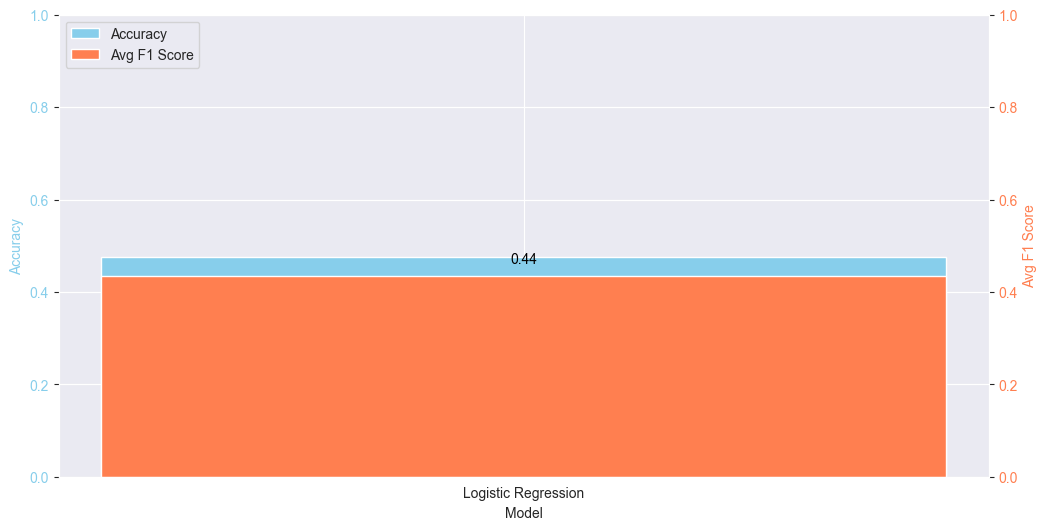

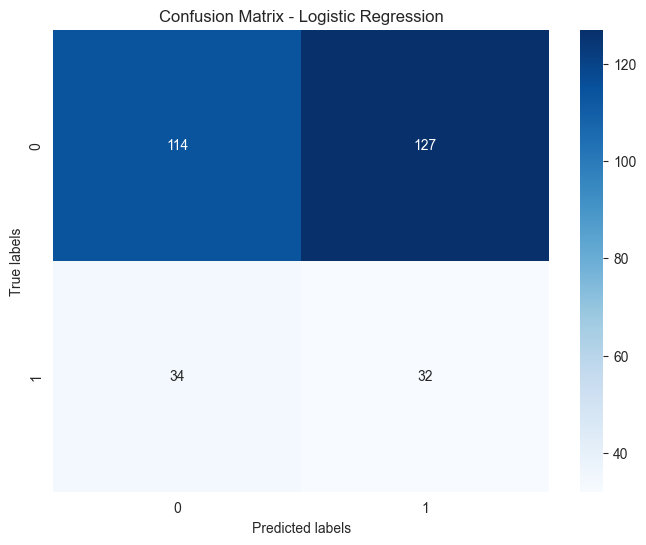



** Decision Tree Report** 
               precision    recall  f1-score   support

           0       0.79      0.68      0.73       241
           1       0.22      0.33      0.27        66

    accuracy                           0.61       307
   macro avg       0.51      0.51      0.50       307
weighted avg       0.67      0.61      0.63       307



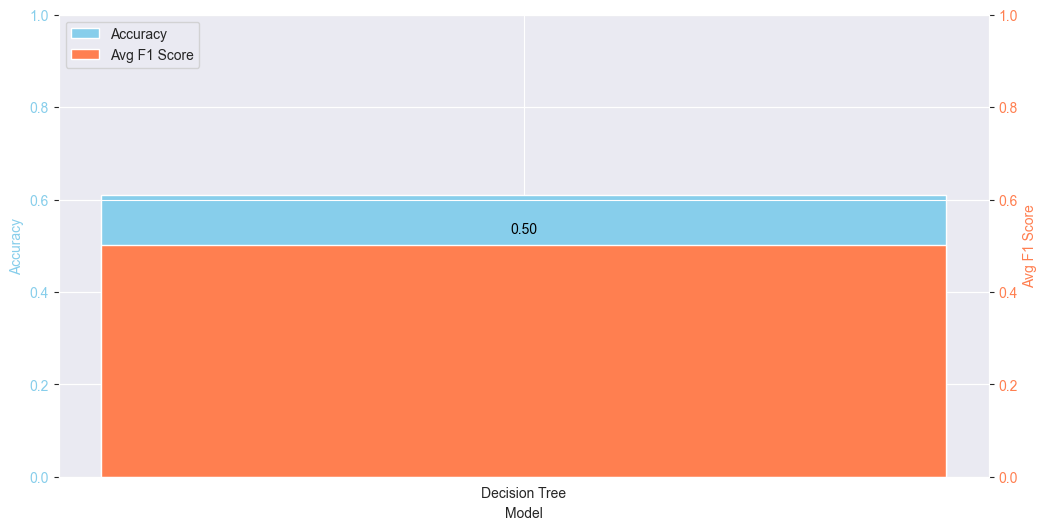

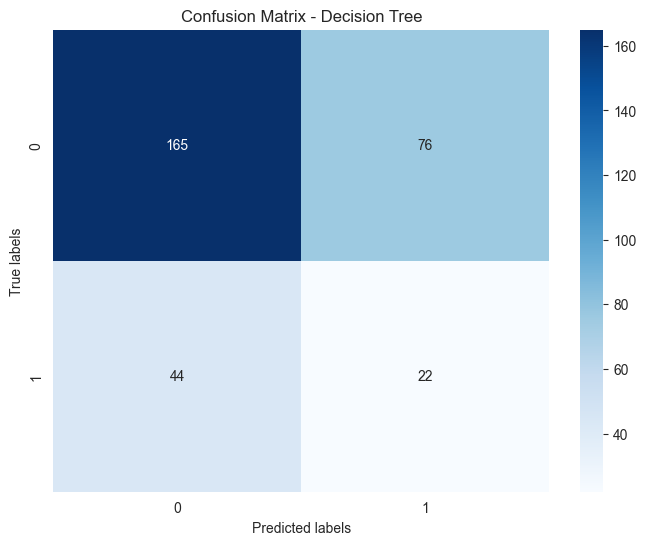

X <class 'numpy.ndarray'> [0]

Top 5 Most Important Features (Decision Tree):
45420.98857829758: 1.000

** Gradient Boosting Report** 
               precision    recall  f1-score   support

           0       0.81      0.63      0.71       241
           1       0.26      0.47      0.34        66

    accuracy                           0.60       307
   macro avg       0.54      0.55      0.52       307
weighted avg       0.69      0.60      0.63       307



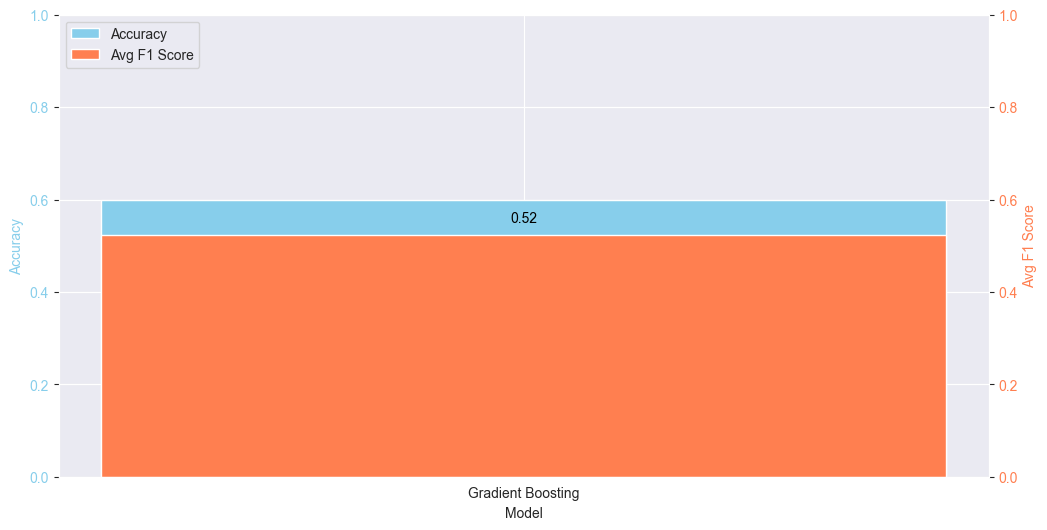

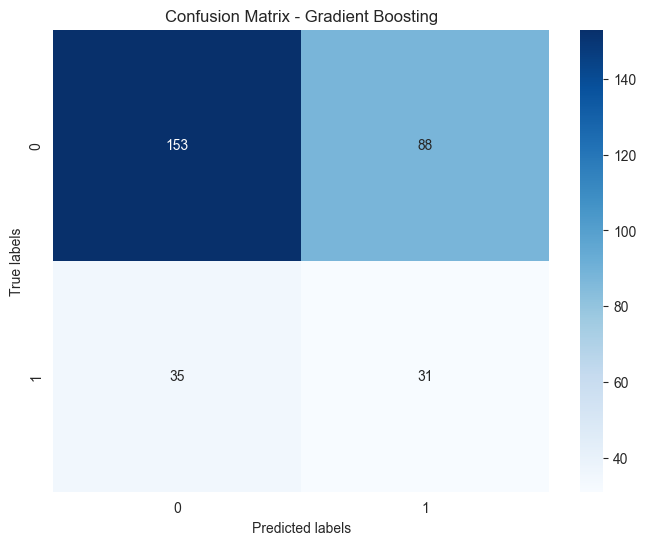

X <class 'numpy.ndarray'> [0]

Top 5 Most Important Features (Gradient Boosting):
45420.98857829758: 1.000

** Random Forest Report** 
               precision    recall  f1-score   support

           0       0.79      0.69      0.74       241
           1       0.23      0.33      0.27        66

    accuracy                           0.62       307
   macro avg       0.51      0.51      0.51       307
weighted avg       0.67      0.62      0.64       307



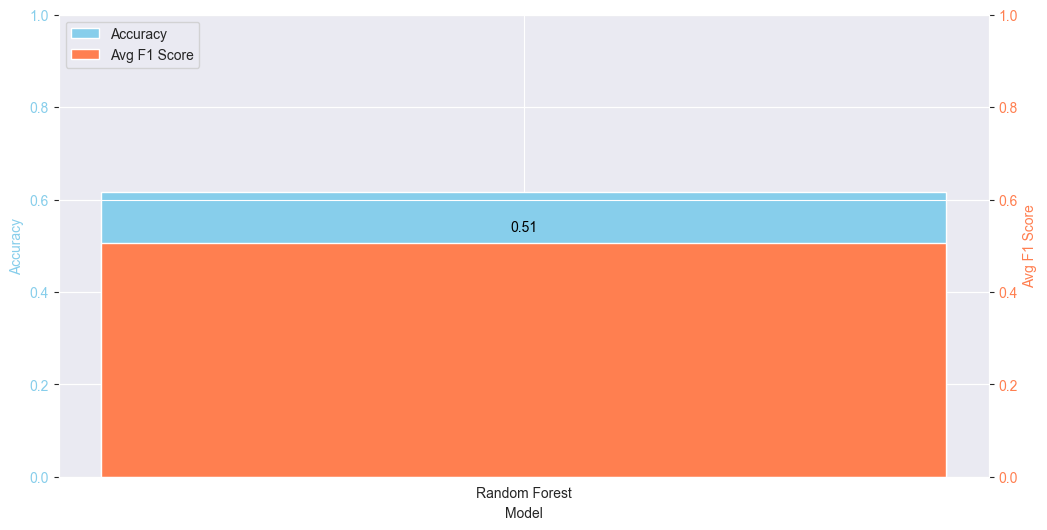

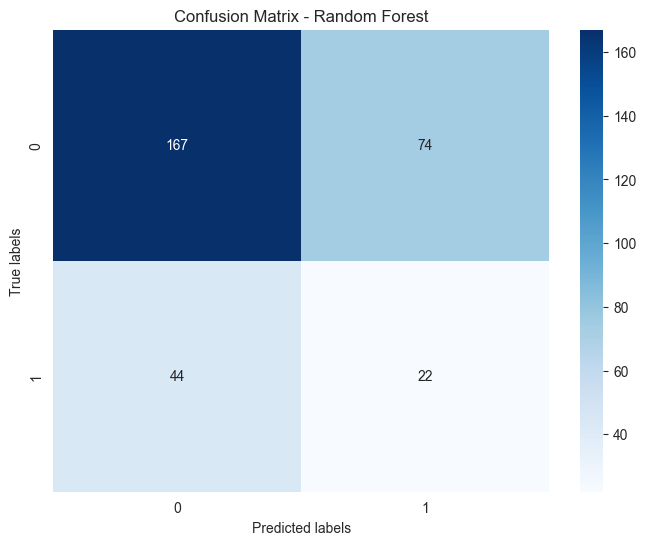

X <class 'numpy.ndarray'> [0]

Top 5 Most Important Features (Random Forest):
45420.98857829758: 1.000

** Support Vector Machine Report** 
               precision    recall  f1-score   support

           0       0.81      0.59      0.69       241
           1       0.25      0.50      0.34        66

    accuracy                           0.57       307
   macro avg       0.53      0.55      0.51       307
weighted avg       0.69      0.57      0.61       307



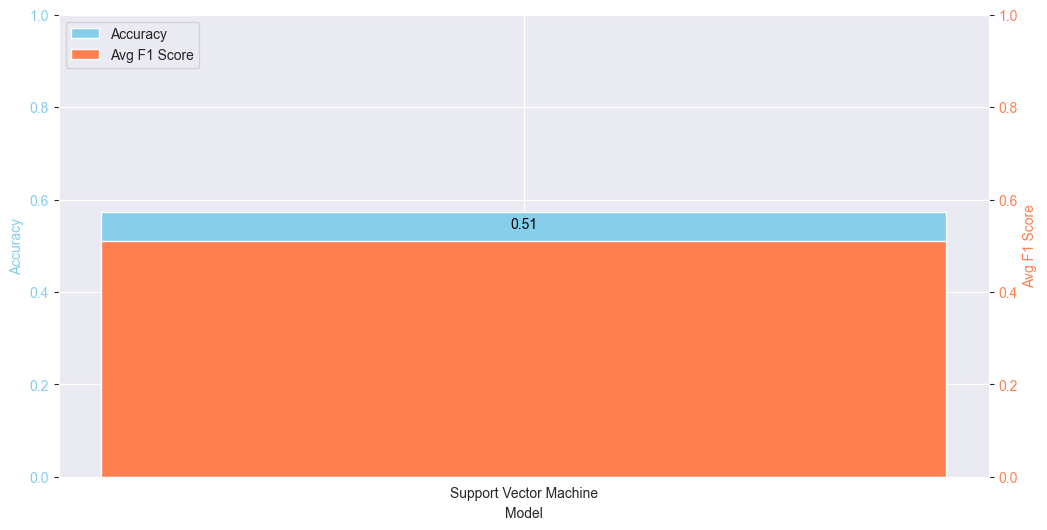

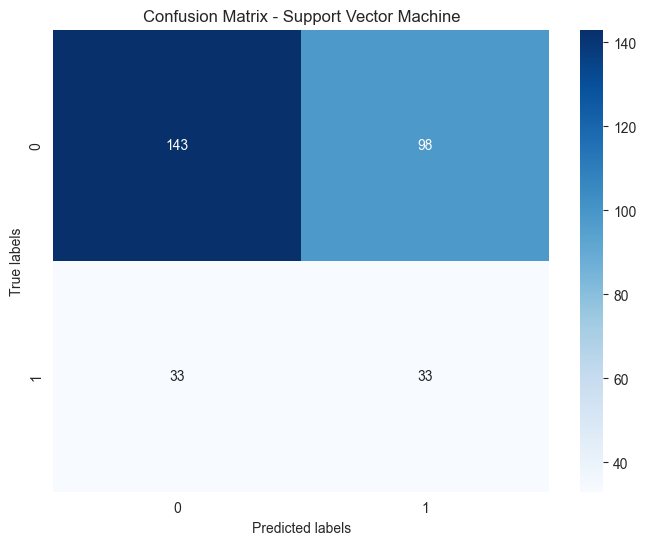



** Multi Perceptron NN Report** 
               precision    recall  f1-score   support

           0       0.79      1.00      0.88       241
           1       0.00      0.00      0.00        66

    accuracy                           0.79       307
   macro avg       0.39      0.50      0.44       307
weighted avg       0.62      0.79      0.69       307



/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

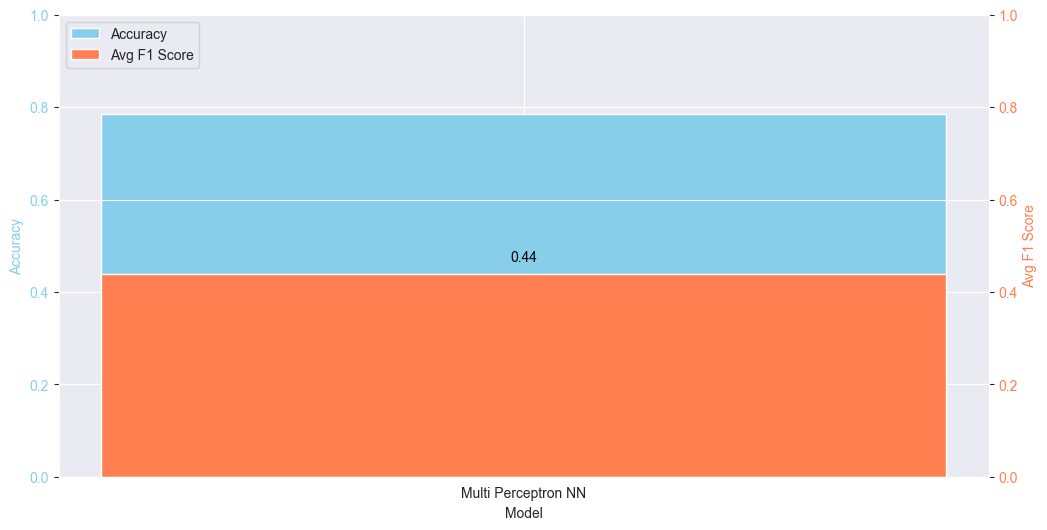

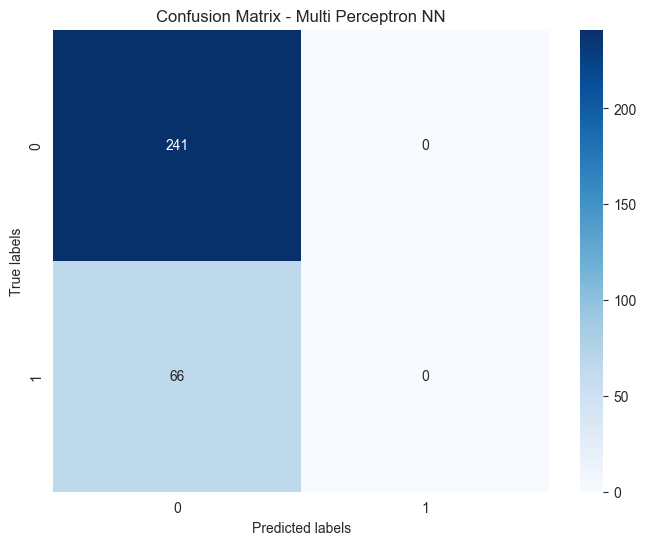

In [25]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.base import clone
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
import seaborn as sns

def balance_dataset(X_train, y_train):
    # Create a RandomOverSampler object
    ros = RandomOverSampler(random_state=42)

    # Resample the dataset
    X_train_balanced, y_train_balanced = ros.fit_resample(X_train, y_train)

    return X_train_balanced, y_train_balanced

def generate_report(model_name, classifier, X, y):
    """
    Generates a training, classification, and important features report,
    including comprehensive visualizations.

    Args:
        X (pd.DataFrame): The DataFrame containing features.
        y (pd.Series): The Series containing target variable.
        model_name (str): The name of the classifier model (e.g., "Logistic Regression").
        classifier (sklearn.base.ClassifierMixin): The classifier object.
    """
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Balance the training data
    X_train_balanced, y_train_balanced = balance_dataset(X_train, y_train)

    # Train the model
    classifier.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = classifier.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Precision, Recall, F1 Score, Support
    precision, recall, f1_score, support = precision_recall_fscore_support(y_test, y_pred)

    # Average F1 Score
    avg_f1 = np.mean(f1_score)

    # Print report
    print(f"\n** {model_name} Report** \n", classification_report(y_test, y_pred))
    
    # Visualizations (assuming you have matplotlib and seaborn installed)
    fig, ax1 = plt.subplots(figsize=(12, 6))

    # Accuracy bar (left y-axis)
    bar_width = 0.35
    accuracy_bar = ax1.bar(model_name, accuracy, bar_width, label='Accuracy', color='skyblue')

    # F1 score bar (right y-axis)
    ax2 = ax1.twinx()
    f1_bar = ax2.bar(model_name, avg_f1, bar_width, label='Avg F1 Score', color='coral')

    # Set labels and limits
    ax1.set_xlabel("Model")
    ax1.set_ylabel('Accuracy', color='skyblue')
    ax1.set_ylim(0, 1)  # Set y-axis limits for accuracy
    ax1.tick_params(axis='y', labelcolor='skyblue')
    ax2.set_ylabel('Avg F1 Score', color='coral')
    ax2.set_ylim(0, 1)  # Set y-axis limits for F1 score
    ax2.tick_params(axis='y', labelcolor='coral')

    # Add F1 score value on the bar
    ax2.text(model_name, avg_f1 + 0.02, f'{avg_f1:.2f}', ha='center', va='bottom', color='black', fontsize=10)

    # Add a legend
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    plt.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

    # Confusion Matrix
    fig, ax = plt.subplots(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

     # Feature importances (for tree-based models)
    if hasattr(classifier, 'feature_importances_'):
        importances = classifier.feature_importances_
        sorted_idx = importances.argsort()[::-1]
        print("X", type(X), sorted_idx)
        top_features = X[sorted_idx[:5]][0]  # Top 5 features
        feature_importance_report = f"\nTop 5 Most Important Features ({model_name}):\n" + "\n".join([f"{feature}: {importance:.3f}" for feature, importance in zip(top_features, importances[sorted_idx[:5]])])
    else:
        feature_importance_report = ""  # No feature importance for Logistic Regression

    # Print feature importance report
    print(feature_importance_report)

# Call generate_report for different models
models = [
    ("Logistic Regression", LogisticRegression()),
    ("Decision Tree", DecisionTreeClassifier()),
    ("Gradient Boosting", GradientBoostingClassifier()),
    ("Random Forest", RandomForestClassifier()),
    ("Support Vector Machine", SVC()),
    ("Multi Perceptron NN", MLPClassifier())
]

for model_name, classifier in models:
    generate_report(model_name, clone(classifier), X_pca, y)
